# Simple SVM
Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image. This is a binary classification problem and we will use SVM algorithm to solve this problem. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bank_df=pd.read_csv("bill_authentication.csv")

In [2]:
bank_df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
bank_df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [4]:
bank_df.shape

(1372, 5)

In [22]:
x=bank_df.iloc[:,:-1].values
y=bank_df.iloc[:,-1].values

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size= 0.30)

In [34]:
from sklearn.svm import SVC
svmclassifier = SVC(kernel='linear')
svmc=svmclassifier.fit(x_train, y_train)

In [26]:
y_pred = svmclassifier.predict(x_test)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
confusion_matrix(y_test, y_pred)

array([[220,   3],
       [  1, 188]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       223
           1       0.98      0.99      0.99       189

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [29]:
print(matthews_corrcoef(y_test, y_pred))

0.9805119111923672


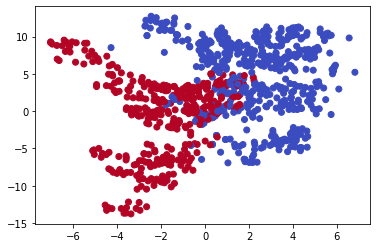

In [32]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)

In [35]:
support_vector_indices = svmc.support_
print(support_vector_indices)

[ 51  65  82 152 256 262 275 350 518 574 590 664 676 745 803 908  76  85
 159 166 202 260 315 478 539 698 785 828 844 944 946 955]


In [36]:
support_vectors_per_class = svmc.n_support_
print(support_vectors_per_class)

[16 16]


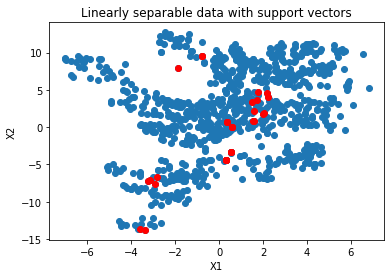

In [38]:
# Get support vectors themselves
support_vectors = svmc.support_vectors_

# Visualize support vectors
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()